#  Is a patient falling from the bed or not? - How to download data to local computer

- The original project classifies patients falling from the bed or not (binary classification) by using deep learning models (ResNet) and fast.ai library.

- This project is based on the project 'Is it a bird? Creating a model from your own data'(https://www.kaggle.com/code/jhoward/is-it-a-bird-creating-a-model-from-your-own-data) by Jeremy Howard, which is a resource of the lecture 1. Getting Started of 'Practical Deep Learning for Coders 2022' course(https://course.fast.ai/).

- **Difference from the first work**: After collecting images, the labels of the images will be reviewed and corrected by a human(myself).

In [1]:
!pip install -Uqq fastai duckduckgo_search



1. Use DuckDuckGo to search for images of "a patient falling from the bed photos".
2. Use DuckDuckGo to search for images of "a patient in the bed photos".
3. **To review the labels of the images and correct them if they are wrong, download all images to local computer**

# Step 1: Download images of a patient falling from the bed and a patient in the bed

In [2]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=30):
  print(f"Searching for '{term}'")
  return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [3]:
urls_falling = search_images("a patient falling from the bed photos", max_images=1)
urls_falling[0]

Searching for 'a patient falling from the bed photos'


'https://www.healthworkscollective.com/wp-content/uploads/2012/10/PatientFall.tif'

In [4]:
urls_not_falling = search_images("a patient in the bed photos", max_images=1)
urls_not_falling[0]

Searching for 'a patient in the bed photos'


'http://share.upmc.com/wp-content/uploads/2015/04/patient-in-bed.jpg'

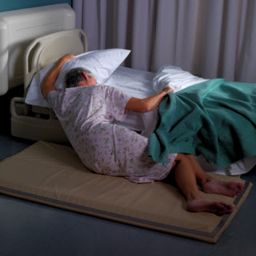

In [5]:
from fastdownload import download_url
from fastai.vision.all import *

dest = 'falling.jpg'
download_url(urls_falling[0], dest, show_progress=False)
Image.open(dest).to_thumb(256,256)

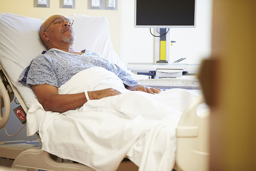

In [6]:
dest_2 = 'not-falling.jpg'
download_url(urls_not_falling[0], dest_2, show_progress=False)
Image.open(dest_2).to_thumb(256, 256)

In [7]:
from time import sleep

def make_dataset(path, file_name, search):
  dest = (path/file_name)
  dest.mkdir(exist_ok=True, parents=True)
  download_images(dest, urls=search_images(f'{search} photo'))
  sleep(10) # Pause between searches to avoid over-loading server
  download_images(dest, urls=search_images(f'{search} sun photo'))
  sleep(10)
  download_images(dest, urls=search_images(f'{search} shade photo'))
  sleep(10)
  resize_images(path/file_name, max_size=250, dest=path/file_name)

path = Path('falling_or_not')
make_dataset(path, 'falling', 'a patient falling from the bed')
make_dataset(path, 'not-falling', 'a patient in the bed')

Searching for 'a patient falling from the bed photo'
Searching for 'a patient falling from the bed sun photo'
Searching for 'a patient falling from the bed shade photo'
Searching for 'a patient in the bed photo'
Searching for 'a patient in the bed sun photo'
Searching for 'a patient in the bed shade photo'


# Step 2: Review the labels of the images and correct them if they are wrong

Some photos might not download correctly, and we'll remove them.

In [8]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

6

Download falling_or_not/ folder to local computer as a zip file

In [18]:
 !zip -r falling_or_not.zip falling_or_not/ 

  adding: falling_or_not/ (stored 0%)
  adding: falling_or_not/falling/ (stored 0%)
  adding: falling_or_not/falling/19e8dfa1-565e-44ea-9c75-fa6f33b6d847.gif (deflated 27%)
  adding: falling_or_not/falling/4888505c-56f1-4435-a4f0-59c55914607a.jpg (deflated 2%)
  adding: falling_or_not/falling/ad2ceb9c-fd2e-4607-85c8-706c44db352e.jpg (deflated 2%)
  adding: falling_or_not/falling/28240053-6c29-4f7e-a3b0-4fe1ca2677ce.jpg (deflated 2%)
  adding: falling_or_not/falling/3b1fe0d1-4631-4c7d-bf58-ce001e6e64dc.jpg (deflated 2%)
  adding: falling_or_not/falling/b3a5da97-5e3c-40ae-a1b8-a740716a46e8.jpg (deflated 2%)
  adding: falling_or_not/falling/6cf5d9aa-a965-4d0b-a121-a81528a4d1a2.jpg (deflated 1%)
  adding: falling_or_not/falling/f25ecd2b-f786-4ead-9c2c-fbf79e3635db.jpg (deflated 2%)
  adding: falling_or_not/falling/22d12016-d042-4068-8855-adbbb3cf9252.jpg (deflated 3%)
  adding: falling_or_not/falling/688146dd-c2b3-4a75-be44-c7679ec130b7.jpg (deflated 3%)
  adding: falling_or_not/falling/6f